# Proyecto Montaña Rusa
<center><img src="img/roller.gif" width="700px"></center> <center><img src="img/tecno.gif" width="700px"></center>

# LIBRERIAS
<img src="img/librerias.gif" width="300px">


In [175]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from numpy.polynomial import chebyshev as ch

# DATOS .CSV
<img src="img/carpeta.gif" width="300px">


In [176]:
def read_section(filename, start_row, num_rows):
    data = pd.read_csv(filename, skiprows=start_row, nrows=num_rows, comment='#')
    return data

# Nombre del archivo CSV
filename = 'Datos.csv'

# Paso 1: Método de Trazador Cúbico Sujeto
data_cubico = read_section(filename, 1, 6)  # Saltar la primera línea de encabezado, leer 6 filas
x_data_cubico = data_cubico['x_cubico'].values
y_data_cubico = data_cubico['y_cubico'].values

# Paso 2 y 3: Polinomio de Mínimos Cuadrados
datos= read_section(filename, 9, 5)  # Saltar 9 líneas, leer 5 filas
x_i = datos['x'].values
y_i = datos['y'].values

# Paso 4: Resolución de Ecuaciones Lineales
data_lineal = read_section(filename, 16, 3)  # Saltar 16 líneas, leer 3 filas
A_data = data_lineal[['A1', 'A2', 'A3']].values
b_data = data_lineal['b'].values

# Calculos y Procedimientos:

<center><img src="img/alan.gif" width="600px"></center>

# PARTE 1:

# Método de Trazador Cúbico Sujeto

El método de trazador cúbico es una técnica utilizada en interpolación numérica para encontrar una función suave que pase a través de un conjunto de puntos de datos. Este método es útil cuando se requiere una interpolación que garantice continuidad en los valores de la función, así como en sus primeras y segundas derivadas. A continuación, se detalla la implementación de este método en Python, junto con la teoría y las fórmulas involucradas.

## Teoría

El método de trazador cúbico sujeto divide el conjunto de datos en segmentos y ajusta un polinomio cúbico en cada segmento. Para garantizar la continuidad en los puntos de datos y sus derivadas, se imponen condiciones específicas en los nodos de interpolación. Las condiciones típicas incluyen:

1. **Interpolación de los puntos de datos**: El trazador cúbico pasa exactamente por cada uno de los puntos de datos proporcionados.

2. **Continuidad de la primera derivada**: La primera derivada del trazador cúbico es continua en los puntos de interpolación.

3. **Continuidad de la segunda derivada**: La segunda derivada del trazador cúbico es continua en los puntos de interpolación.

Para lograr estas condiciones, se calculan los coeficientes de los polinomios cúbicos utilizando métodos algebraicos, como la resolución de sistemas tridiagonales o el método de eliminación de Gauss-Jordan.

## Fórmulas

### Coeficientes del Trazador Cúbico

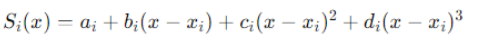

Los coeficientes \( a_i, b_i, c_i, d_i \) del trazador cúbico se calculan de la siguiente manera:

- \( a_i \): Coeficiente constante, igual al valor de \( y_i \).
- \( b_i \): Coeficiente lineal, calculado como \( b_i = \frac{y_{i+1} - y_i}{h_i} - \frac{h_i}{3} (c_{i+1} + 2c_i) \), donde \( h_i = x_{i+1} - x_i \).
- \( c_i \): Coeficiente cuadrático, obtenido como solución de un sistema tridiagonal.
- \( d_i \): Coeficiente cúbico, calculado como \( d_i = \frac{c_{i+1} - c_i}{3h_i} \).

### Evaluación del Trazador Cúbico

Para evaluar el trazador cúbico en un punto \( x \):

- Se determina el segmento \( [x_i, x_{i+1}] \) que contiene a \( x \).
- Se calcula \( y(x) \) utilizando el polinomio cúbico correspondiente al segmento encontrado.


## Implementación en Python

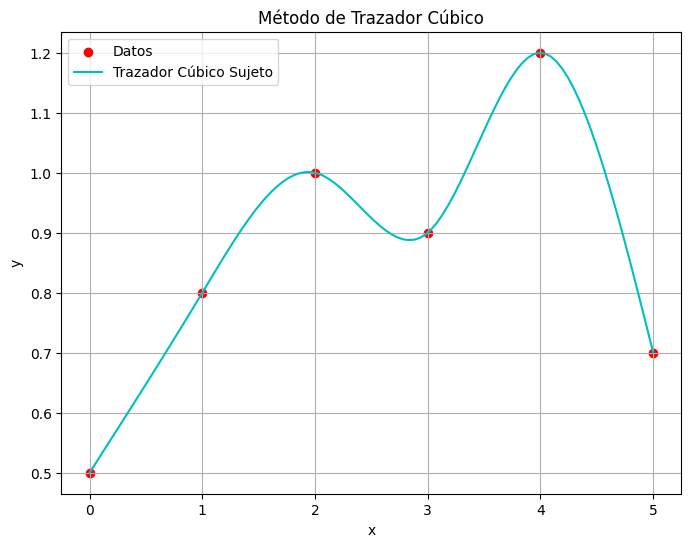

In [177]:
# Datos para el Método de Trazador Cúbico Sujeto
x_datos = np.array(x_data_cubico)
y_datos = np.array(y_data_cubico)

# Función para calcular los coeficientes del trazador cúbico
def coeficientes_trazador_cubico(x, y):
    n = len(x)
    # Inicializar los vectores para almacenar los coeficientes
    a = y.copy()
    b = np.zeros(n - 1)
    d = np.zeros(n - 1)
    h = np.diff(x)
    alpha = np.zeros(n - 1)
    c = np.zeros(n)
    
    # Calculando los coeficientes de la matriz tridiagonal
    for i in range(1, n - 1):
        alpha[i] = 3 / h[i] * (a[i + 1] - a[i]) - 3 / h[i - 1] * (a[i] - a[i - 1])
    
    # Resolviendo el sistema tridiagonal para encontrar c
    l = np.zeros(n)
    u = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    u[0] = 0
    z[0] = 0
    
    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
    
    l[n - 1] = 1
    z[n - 1] = 0
    c[n - 1] = 0
    
    # Resolviendo para b y d
    for j in range(n - 2, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
    
    # Devolver los coeficientes calculados
    return a, b, c, d

# Función para evaluar el trazador cúbico en un punto x_eval
def evaluar_trazador_cubico(x_eval, x_datos, y_datos, a, b, c, d):
    n = len(x_datos)
    for i in range(n - 1):
        if x_eval >= x_datos[i] and x_eval <= x_datos[i + 1]:
            dx = x_eval - x_datos[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return np.nan  # Si x_eval está fuera del rango de x_datos

# Calcular los coeficientes del trazador cúbico
a, b, c, d = coeficientes_trazador_cubico(x_datos, y_datos)

# Valores para graficar la curva
x_vals = np.linspace(0, 5, 100)
y_vals = np.array([evaluar_trazador_cubico(x, x_datos, y_datos, a, b, c, d) for x in x_vals])

# Graficar los datos y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x_datos, y_datos, color='red', label='Datos',marker='o')
plt.plot(x_vals, y_vals, color='c', label='Trazador Cúbico Sujeto')
plt.title('Método de Trazador Cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# PARTE 2:

# Polinomio de Mínimos Cuadrados

El polinomio de mínimos cuadrados es una técnica utilizada para encontrar la función polinómica que mejor se ajusta a un conjunto de datos, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los predichos por el polinomio. A continuación, se detalla la implementación de este método en Python, junto con la teoría y las fórmulas involucradas.

## Teoría

El método de mínimos cuadrados busca encontrar un polinomio \( P(x) \) de grado \( n \) que minimice la función de error cuadrático:


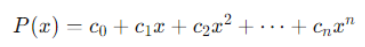

Minimizamos la función de error:

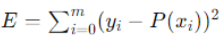


donde \( (x_i, y_i) \) son los puntos de datos, \( n \) es el número de puntos y \( P(x_i) \) es el valor predicho por el polinomio en el punto \( x_i \).

Para ajustar un polinomio de grado \( n \) a los datos, obtenemos los para obtener los coeficientes.

# Procedimiento:

1. **Selección del Grado del Polinomio:** Se elige un grado \( n \) para el polinomio de mínimos cuadrados en función de la complejidad de los datos y la precisión requerida en el análisis de estabilidad.

2. **Construcción del Sistema de Ecuaciones:** Se construye un sistema de ecuaciones lineales utilizando las condiciones de mínimos cuadrados:

3. **Resolución del Sistema de Ecuaciones:** Se resuelve el sistema de ecuaciones lineales para encontrar los coeficientes del polinomio de mínimos cuadrados utilizando métodos numéricos como la eliminación gaussiana o la descomposición LU.

4. **Evaluación del Ajuste:** Una vez obtenidos los coeficientes del polinomio, se evalúa su desempeño calculando el coeficiente de determinación \( R^2 \), el cual indica qué porcentaje de la variabilidad de los datos es explicado por el modelo de polinomio de mínimos cuadrados.

### Aplicación en el Diseño de la Montaña Rusa

El método de mínimos cuadrados es crucial en el diseño de la montaña rusa para asegurar que la estructura sea capaz de resistir las fuerzas y tensiones esperadas durante el uso. A través de este análisis, se garantiza que la vía de la montaña rusa sea estable y cumpla con los estándares de seguridad estructural requeridos para la operación segura y confiable del parque de atracciones.

## Implementación en Python

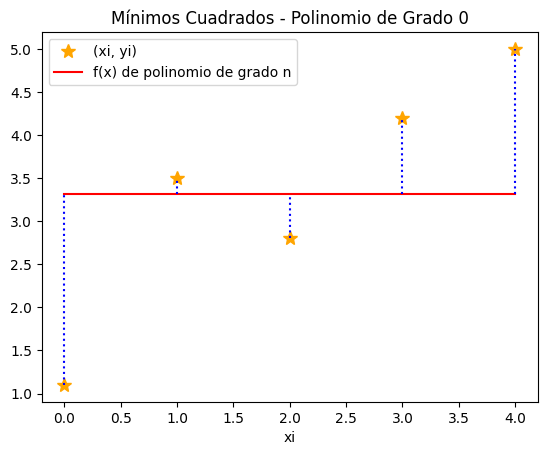

Polinomio ajustado f(x) = 3.32000000000000
Coeficiente de determinación R² = -2.220446049250313e-16
-0.0% de los datos está descrito en el modelo de grado 0


In [178]:
# INGRESO
#toma valor random de 0 a 5
grado_n = np.random.randint(0, 5)

# PROCEDIMIENTO
xi = np.array(x_i, dtype=float)
yi = np.array(y_i, dtype=float)
n = len(xi)

# Construir la matriz de Vandermonde para polinomio de grado n
A = np.vander(xi, grado_n + 1, increasing=True)

# Vector de valores observados
b = yi

# Resolver el sistema de ecuaciones normales
ATA = np.dot(A.T, A)
ATb = np.dot(A.T, b)
coeficientes = np.linalg.solve(ATA, ATb)

# Definir el polinomio usando sympy
x = sym.Symbol('x')

polinomio = 0
for i in range(grado_n + 1):
    polinomio += coeficientes[i] * x**i

# Evaluar el polinomio ajustado
fx = sym.lambdify(x, polinomio)

if grado_n == 0:
    fi = [fx(0)] * len(xi)  # fi es una lista de la constante
else:
    fi = fx(xi)

# Gráfica de los datos y el ajuste
x_vals = np.linspace(min(xi), max(xi), 100)
y_vals = fx(x_vals)

plt.plot(xi, yi, '*', label='(xi, yi)', color='orange', markersize=10)

if grado_n == 0:
    plt.plot(x_vals, [coeficientes[0]]*len(x_vals), color='red', label="f(x) de polinomio de grado n")
else:
    plt.plot(x_vals, y_vals, color='red', label="f(x) de polinomio de grado n")

# Líneas de error
for i in range(n):
    y0 = min(yi[i], fi[i])
    y1 = max(yi[i], fi[i])
    plt.vlines(xi[i], y0, y1, color='blue', linestyle='dotted')

plt.legend()
plt.xlabel('xi')
plt.title(f'Mínimos Cuadrados - Polinomio de Grado {grado_n}')
plt.show()

# Calcular el coeficiente de determinación R²
media_y = np.mean(yi)
ss_total = np.sum((yi - media_y)**2)
ss_residual = np.sum((yi - fi)**2)
r2 = 1 - (ss_residual / ss_total)
r2_porcentaje = np.around(r2 * 100, 2)

# SALIDA
print(f'Polinomio ajustado f(x) = {polinomio}')
print(f'Coeficiente de determinación R² = {r2}')
print(f'{r2_porcentaje}% de los datos está descrito en el modelo de grado {grado_n}')


# PARTE 3:

## Polinomios Ortogonales

En el diseño de la montaña rusa, se utiliza el concepto de polinomios ortogonales, como los polinomios de Chebyshev, para optimizar la forma de ciertos tramos de la vía y mejorar la experiencia del usuario. Estos polinomios tienen propiedades especiales que los hacen ideales para ajustar funciones de manera eficiente y reducir los errores en el modelado de la trayectoria.

### Polinomios de Chebyshev

Los polinomios de Chebyshev son una familia de polinomios ortogonales que tienen la característica de minimizar el efecto de Runge, lo cual significa que son óptimos para la interpolación y el ajuste de funciones en un rango dado. En el contexto del diseño de la montaña rusa, ajustamos un polinomio de Chebyshev de grado \( n \) a los datos experimentales de la trayectoria. Este proceso implica encontrar los coeficientes del polinomio de Chebyshev que mejor se ajustan a los datos proporcionados.

### Implementación en el Diseño de la Montaña Rusa

Para aplicar los polinomios de Chebyshev en el diseño:

1. **Selección del Grado del Polinomio:** Se elige un grado \( n \) para el polinomio de Chebyshev según la complejidad requerida para modelar la trayectoria de la vía de la montaña rusa.
   
2. **Ajuste del Polinomio:** Utilizamos la función `PolinomioChebyshev` para ajustar el polinomio de Chebyshev a los datos experimentales. Esta función encuentra los coeficientes del polinomio que minimizan los errores cuadráticos mediante un método de ajuste basado en raíces y evaluaciones escaladas.

3. **Evaluación del Ajuste:** Evaluamos el polinomio de Chebyshev ajustado en un rango de valores, lo cual nos permite visualizar y analizar la trayectoria estimada de la vía de la montaña rusa.

4. **Optimización y Mejora:** Los polinomios de Chebyshev contribuyen a minimizar errores y optimizar la forma de ciertos tramos de la vía, lo cual mejora la experiencia del usuario al proporcionar una trayectoria suave y continua.

### Aplicación en el Diseño de la Montaña Rusa

En el diseño de la montaña rusa, la aplicación de polinomios de Chebyshev asegura que la trayectoria sea suave y continua, proporcionando así una experiencia más placentera y segura para los usuarios. Estos polinomios son fundamentales para el modelado matemático preciso de la trayectoria, permitiendo ajustes finos que cumplen con los estándares de diseño y seguridad requeridos en parques de atracciones.

Mediante este enfoque, se logra integrar la precisión matemática con la experiencia práctica, asegurando que la montaña rusa no solo sea emocionante, sino también cómoda y segura para los visitantes del parque de atracciones.

### Formulas ###
- Obtencion de raices del polinomio:

    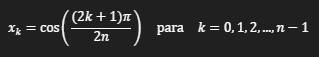

    Donde ( x_k ) es la ( k )-ésima raíz del polinomio de Chebyshev y ( n ) es el grado del polinomio. Esta fórmula produce raíces que están en el intervalo ([-1, 1]).
    
- Escalado de las raices:

    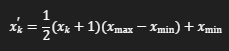

    Donde ( x’k ) es la raíz escalada, ( x_k ) es la raíz original del polinomio de Chebyshev, y ( xmax ) y ( xmin ) son los valores máximo y mínimo de tus datos ( x ).


### Funciones para polinomios ###
- Polyfit:

    Esta función se utiliza para ajustar un polinomio de un grado determinado a un conjunto de datos mediante el método de los mínimos cuadrados. La función intenta encontrar los coeficientes del polinomio que mejor se ajustan a los datos, minimizando la suma de los cuadrados de las diferencias entre los datos observados y los predichos por el modelo polinómico. Los parámetros de entrada son los valores de ( x ) y ( y ) de los datos, y el grado del polinomio que deseas ajustar.
    
- Poly1d:

    Esta función crea un objeto polinómico a partir de una secuencia de coeficientes. Con este objeto, puedes realizar operaciones polinómicas como evaluar el polinomio en un punto dado, integrar o derivar el polinomio, y más. Es una forma conveniente de trabajar con polinomios en código, ya que encapsula las operaciones “naturales” que se suelen realizar con polinomios.

- Arange:

    Creacion de lista por rango en objeto de NumPy.

- Linespace:

    Creacion de lista a partir de numeros espaciados uniformemente dentro de un intervalo.

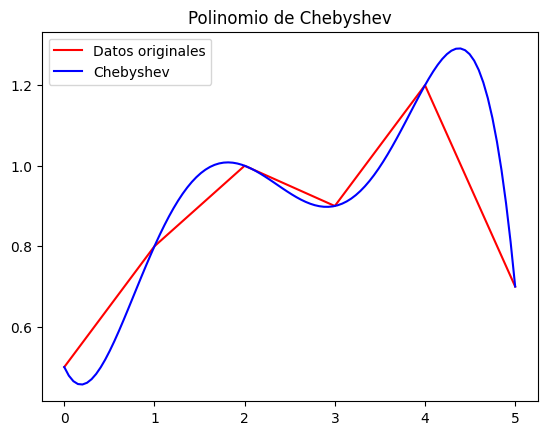

Grado: 5, Coeficientes: [-0.02333333  0.27083333 -1.075       1.62916667 -0.50166667  0.5       ]


In [179]:
# Función para ajustar un polinomio de Chebyshev a los datos
def PolinomioChebyshev(GradoChebyshev, ArrayX, ArrayY):
    # Calcular las raíces del polinomio de Chebyshev y escalarlas
    # Distrubución de las raíces de Chebyshev en el intervalo [-1, 1]
    RaicesPolinomio = np.cos(
        (2 * np.arange(GradoChebyshev + 1) + 1) * np.pi 
        / 
        (2 * (GradoChebyshev + 1))
    )
    # Se escalan las raíces al intervalo de los datos originales para conseguir el eje x
    RaicesPolinomioEscaladas = (
        0.5 * (RaicesPolinomio + 1) * (ArrayX.max() - ArrayX.min())
    ) + ArrayX.min()
    
    # Ajustar un polinomio a los datos originales y evaluar el polinomio resultante en las raíces escaladas
    polinomio = np.poly1d(np.polyfit(ArrayX, ArrayY, GradoChebyshev))
    EvalY = polinomio(RaicesPolinomioEscaladas)
    
    # Ajustar un polinomio usando las raíces escaladas y los valores evaluados
    return np.polyfit(RaicesPolinomioEscaladas, EvalY, GradoChebyshev)



def ListaIntervalo(min, max, intervalo = 100):
    return np.linspace(min, max, intervalo)

# Transformacion de datos del CSV a arrays de numpy
ArrayX = np.array(x_data_cubico)
ArrayY = np.array(y_data_cubico)
# Grado del polinomio de Chebyshev
grado = 5

# Obteniendo el polinomio de Chebyshev
PolinomioResultante = np.poly1d(PolinomioChebyshev(grado, ArrayX, ArrayY))

# Grafica de los datos originales y el polinomio de Chebyshev
plt.plot(ArrayX, ArrayY, label='Datos originales', color='red')
plt.plot(
    ListaIntervalo(ArrayX.min(), ArrayX.max()),
    PolinomioResultante(ListaIntervalo(ArrayX.min(), ArrayX.max())),
    label='Chebyshev', color='blue'
)
plt.legend()
plt.title('Polinomio de Chebyshev')
plt.show()

# Mostrar los coeficientes del polinomio ajustado
print(f"Grado: {grado}, Coeficientes: {PolinomioResultante.coefficients}")

# PARTE 4:

## Resolución de Ecuaciones Lineales

En el diseño de la montaña rusa, es fundamental resolver sistemas de ecuaciones lineales para determinar las fuerzas que actúan en puntos críticos de la estructura. Estas fuerzas son cruciales para garantizar la estabilidad y seguridad de la montaña rusa durante su operación.

### Teoría

Un sistema de ecuaciones lineales se define como:

$$ A \mathbf{x} = \mathbf{b} $$

donde A es la matriz de coeficientes,x es el vector de incógnitas (fuerzas en puntos críticos) y  b es el vector de términos independientes que representa las cargas o condiciones externas aplicadas al sistema.

### Implementación

1. **Definición del Sistema de Ecuaciones:** Se define la matriz A  y el vector b utilizando los datos específicos del problema de diseño de la montaña rusa.

2. **Resolución del Sistema de Ecuaciones:** Se utiliza un método numérico como la eliminación gaussiana, encontrar las soluciones de X.

<center><img src="img/gauss.gif" width="200px"></center>

3. **Interpretación de los Resultados:** Una vez resuelto el sistema de ecuaciones, se obtienen las fuerzas en los puntos críticos de la estructura. Estas fuerzas son fundamentales para el diseño y la construcción de la montaña rusa, asegurando que la estructura pueda soportar las cargas esperadas sin comprometer la seguridad de los pasajeros.

### Aplicación en el Diseño de la Montaña Rusa

La resolución de ecuaciones lineales juega un papel crucial en el diseño de la montaña rusa al proporcionar información precisa sobre las fuerzas internas y externas que actúan sobre la estructura. Este análisis permite a los ingenieros optimizar el diseño y garantizar que la montaña rusa sea segura, estable y cumpla con los estándares de seguridad estructural requeridos para su operación en un parque de atracciones.


La solución del sistema es:
[[-0.2       ]
 [ 0.93333333]
 [ 2.33333333]]


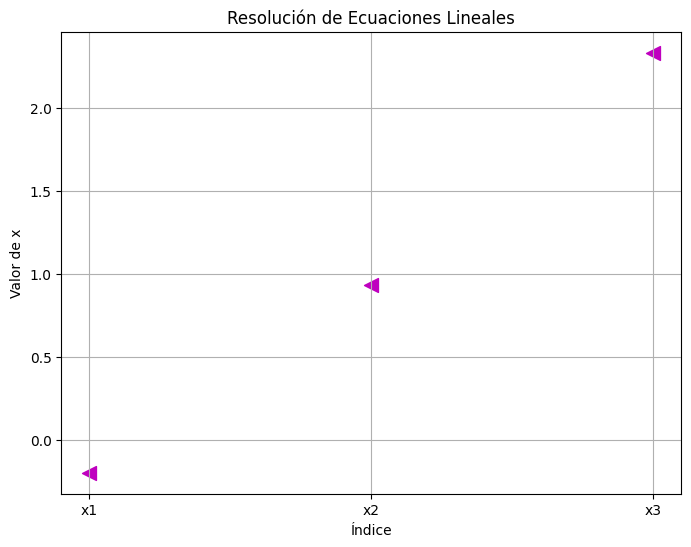

In [180]:
def gauss_jordan(A, B):
    # Evitar truncamiento en operaciones    
    casicero = 1e-15  # Considerar como 0
    
    # Convertir B en una matriz columna
    B = B[:, np.newaxis]
    
    # Matriz aumentada
    AB = np.concatenate((A, B), axis=1)
    
    # Pivoteo parcial por filas
    tamano = np.shape(AB)
    n = tamano[0]
    m = tamano[1]
    
    # Para cada fila en AB
    for i in range(0, n):
        # columna desde diagonal i en adelante
        columna = abs(AB[i:, i])
        dondemax = i + np.argmax(columna)
        
        # Intercambiar filas si el pivote es cero
        if abs(AB[dondemax, i]) < casicero:
            return None
        
        # Intercambiar filas i y dondemax
        AB[[i, dondemax]] = AB[[dondemax, i]]
        
        # Eliminación hacia adelante
        for k in range(i+1, n):
            factor = AB[k, i] / AB[i, i]
            AB[k, :] -= factor * AB[i, :]
    
    # Eliminación hacia atrás
    for i in range(n-1, -1, -1):
        # Asegurarse de que el pivote sea 1
        pivote = AB[i, i]
        AB[i, :] /= pivote
        
        for k in range(i):
            factor = AB[k, i]
            AB[k, :] -= factor * AB[i, :]
    
    # Extraer la solución X
    X = AB[:, n:]
    
    return X
        

# Datos de entrada
A = np.array([[1, 2, 1], [2, -1, 1], [3, 1, -1]], dtype=float)
b = np.array([4, 1, -2], dtype=float)

# Llamar a la función
X = gauss_jordan(A, b)


# SALIDA
print(f'La solución del sistema es:\n{X}')


# Graficar los resultados como puntos
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(X)), X.flatten(), color='m', marker='<', s=100)  # Usar flatten para convertir X a un array unidimensional
plt.title('Resolución de Ecuaciones Lineales')
plt.xlabel('Índice')
plt.ylabel('Valor de x')
plt.xticks(np.arange(len(X)), ['x1', 'x2', 'x3'])
plt.grid(True)
plt.show()

##  eSo fUe todO

<img src="img/despedida.gif" width="200px">